In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [7]:
pi = math.pi

x = np.cos(-pi/4)
y = np.sin(-pi/4)
w = np.cos(pi/4)
z = np.sin(pi/4)

a1 = 45
b1 = 10
c1 = 25

a2 = 3
b2 = 15
c2 = 15

d = 125

d01 = 3
d1n = 15

velocity = 5.0
g = 9.82

In [8]:
H_r_c = np.array([[x, -y, 0, a2],
                  [y, x, 0, -b1-b2],
                  [0, 0, 1, c2],
                  [0, 0, 0, 1]])

H_r_a0 = np.array([[1, 0, 0, -a1],
                  [0, 1, 0, -b1],
                  [0, 0, 1, c1],
                  [0, 0, 0, 1]])

H_r_p1 = np.array([[x, -y, 0, 0],
                  [y, x, 0, 20],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])

H_r_p2 = np.array([[x, -y, 0, 0],
                  [y, x, 0, -20],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])

H_r_p3 = np.array([[x, -y, 0, -50],
                  [y, x, 0, -20],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])

H_r_p4 = np.array([[x, -y, 0, -50],
                  [y, x, 0, 0],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])

H_r_p5 = np.array([[x, -y, 0, -50],
                  [y, x, 0, 20],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])

In [9]:
def plant_init(H_o_r_init, phi_deg, theta_deg):
    
    phi = phi_deg*pi/180
    theta = theta_deg*pi/180
    beta = (45*pi/180) - theta
    
    H_c_p_init = np.array([[w, -z, 0, d*np.cos(theta)/np.cos(beta)],
                          [z, w, 0, -d*np.sin(theta)/np.cos(beta)],
                          [0, 0, 1, d*np.tan(phi)/np.cos(beta)],
                          [0, 0, 0, 1]])
    print("H_c_p_init = ",H_c_p_init)
    
    H_o_c_init = np.matmul(H_o_r_init, H_r_c)
    H_o_p = np.matmul(H_o_c_init, H_c_p_init)
    
    return H_o_p

In [10]:
phi_deg = 30
theta_deg = 30

H_o_r_init = np.array([[1, 0, 0, 0],
                      [0, 1, 0, 0],
                      [0, 0, 1, 0],
                      [0, 0, 0, 1]])

In [11]:
H_o_p = plant_init(H_o_r_init, phi_deg, theta_deg)
H_o_p

H_c_p_init =  [[  0.70710678  -0.70710678   0.         112.07193402]
 [  0.70710678   0.70710678   0.         -64.70476128]
 [  0.           0.           1.          74.71462268]
 [  0.           0.           0.           1.        ]]


array([[   1.        ,    0.        ,    0.        ,   36.49364905],
       [   0.        ,    1.        ,    0.        , -150.        ],
       [   0.        ,    0.        ,    1.        ,   89.71462268],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

In [12]:
def H_inv(H):
    R = np.array([H[0][0:3],
                  H[1][0:3],
                  H[2][0:3]])

    t = np.array([H[0][3],
                  H[1][3],
                  H[2][3]])

    R_T = np.transpose(R) 
    x = np.transpose(np.matmul(R_T,-t).reshape(1,3))
    y = np.concatenate((R_T,x), axis = 1)

    H_inv = np.concatenate((y,np.array([[0, 0, 0, 1]])), axis = 0)
    return H_inv

In [30]:
def localize(H_o_r):
    H_r_o = H_inv(H_o_r)
    H_r_p = np.matmul(H_r_o, H_o_p)
    H_a0_r = H_inv(H_r_a0)
    H_a0_p = np.matmul(H_a0_r, H_r_p)
    
    if H_a0_p[0][3] < 0:
        theta1 = 180 - (np.arctan(H_a0_p[1][3]/H_a0_p[0][3])*180/pi)
    else: 
        theta1 = np.arctan(-H_a0_p[1][3]/H_a0_p[0][3])*180/pi
        
    distance = ((H_a0_p[1][3]**2)+(H_a0_p[0][3]**2))**0.5
    height = H_a0_p[2][3]
    
    '''
    theta1_1 = np.arccos(round(H_a0_p[0][0],8))*180/pi
    if (H_a0_p[0][0]>0 and H_a0_p[0][1]>0) or (H_a0_p[0][0]<0 and H_a0_p[0][1]>0) :
        theta1_1 = -theta1_1
    
    print("H_r_o = ",H_r_o)
    print("H_r_p = ",H_r_p)
    print("H_a0_r = ",H_a0_r)
    print("H_a0_p = ",H_a0_p)
    '''
    
    return theta1, distance, height

In [31]:
def robot_outline(H_o_r):
    H_o_p1 = np.matmul(H_o_r, H_r_p1)
    H_o_p2 = np.matmul(H_o_r, H_r_p2)
    H_o_p3 = np.matmul(H_o_r, H_r_p3)
    H_o_p4 = np.matmul(H_o_r, H_r_p4)
    H_o_p5 = np.matmul(H_o_r, H_r_p5)

    points_x = [H_o_p1[0][3],H_o_p2[0][3],H_o_p3[0][3],H_o_p4[0][3],H_o_p5[0][3],H_o_p1[0][3]]
    points_y = [H_o_p1[1][3],H_o_p2[1][3],H_o_p3[1][3],H_o_p4[1][3],H_o_p5[1][3],H_o_p1[1][3]]
    points_x = np.array(points_x)
    points_y = np.array(points_y)

    return points_x, points_y

In [32]:
H_o_r = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 1, 0],
                 [0, 0, 0, 1]])

localize(H_o_r)

(59.79642240729058, 161.9914035870998, 64.71462268067111)

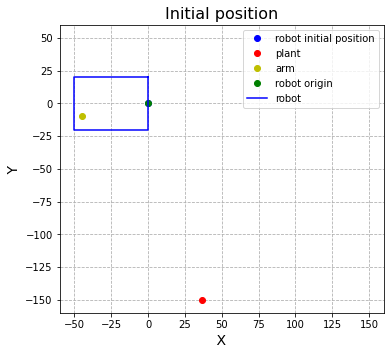

In [33]:
H_o_a0 = np.matmul(H_o_r, H_r_a0)
points_x, points_y = robot_outline(H_o_r)

fig = plt.figure()
ax=fig.add_axes([0,0,0.75,1])
ax.set_title("Initial position",fontsize=16)
ax.set_xlabel(" X ",fontsize=14)
ax.set_ylabel(" Y ",fontsize=14)

plt.plot(0,0,'ob',label="robot initial position")
plt.plot(H_o_p[0][3],H_o_p[1][3],'or',label="plant")
plt.plot(H_o_a0[0][3],H_o_a0[1][3],'oy',label="arm")
plt.plot(H_o_r[0][3],H_o_r[1][3],'og',label="robot origin")
plt.plot(points_x,points_y,'-b',label="robot")

plt.xlim((-60,160))
plt.ylim((-160,60))
plt.grid(True,which="both", linestyle='--')
plt.legend()
plt.show()

In [34]:
gama_deg = 60
gama = gama_deg*pi/180
H_o_r = np.array([[np.cos(gama), -np.sin(gama), 0, 5],
                 [np.sin(gama), np.cos(gama), 0, 2],
                 [0, 0, 1, 0],
                 [0, 0, 0, 1]])

localize(H_o_r)

(127.23505543302213, 117.15524150294232, 64.71462268067111)

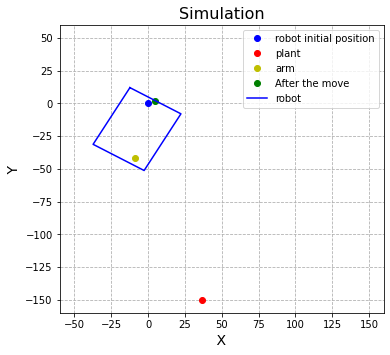

In [35]:
H_o_a0 = np.matmul(H_o_r, H_r_a0)
points_x, points_y = robot_outline(H_o_r)

fig = plt.figure()
ax=fig.add_axes([0,0,0.75,1])
ax.set_title("Simulation",fontsize=16)
ax.set_xlabel(" X ",fontsize=14)
ax.set_ylabel(" Y ",fontsize=14)

plt.plot(0,0,'ob',label="robot initial position")
plt.plot(H_o_p[0][3],H_o_p[1][3],'or',label="plant")
plt.plot(H_o_a0[0][3],H_o_a0[1][3],'oy',label="arm")
plt.plot(H_o_r[0][3],H_o_r[1][3],'og',label="After the move")
plt.plot(points_x,points_y,'-b',label="robot")

plt.xlim((-60,160))
plt.ylim((-160,60))
plt.grid(True,which="both", linestyle='--')
plt.legend()
plt.show()

In [36]:
def draw_axis(H,option):
    x = H[0][3]
    y = H[1][3]
    
    theta = np.arccos(round(H[0][0],8))*180/pi
    if (H[0][0]>0 and H[0][1]>0) or (H[0][0]<0 and H[0][1]>0):
        theta = -theta
    
    X=[x,x+20*H[0][0],x+15*np.cos((theta+5)*pi/180),x+20*H[0][0],x+15*np.cos((theta-5)*pi/180),x+20*H[0][0],x,x+20*H[0][1],
       x-15*np.sin((theta+5)*pi/180),x+20*H[0][1],x-15*np.sin((theta-5)*pi/180),x+20*H[0][1]]
    Y=[y,y+20*H[1][0],y+15*np.sin((theta+5)*pi/180),y+20*H[1][0],y+15*np.sin((theta-5)*pi/180),y+20*H[1][0],y,y+20*H[0][0],
       y+15*np.cos((theta+5)*pi/180),y+20*H[0][0],y+15*np.cos((theta-5)*pi/180),y+20*H[0][0]]
    
    #X=[x,x+20*H[0][0]]
    #Y=[y,y+20*H[1][0]]
    X = np.array(X)
    Y = np.array(Y)
    
    plt.plot(X,Y,option)

theta1 =  61.3723 distance =  162.45635 height =  64.71462
theta1 =  64.52823 distance =  163.42442 height =  64.71462
theta1 =  67.68924 distance =  164.44674 height =  64.71462
theta1 =  70.85467 distance =  165.5273 height =  64.71462
theta1 =  74.02372 distance =  166.6701 height =  64.71462
theta1 =  77.19554 distance =  167.87909 height =  64.71462
theta1 =  80.36914 distance =  169.15816 height =  64.71462
theta1 =  83.54348 distance =  170.51109 height =  64.71462
theta1 =  86.71741 distance =  171.94158 height =  64.71462
theta1 =  89.88975 distance =  173.45319 height =  64.71462
theta1 =  93.05923 distance =  175.04933 height =  64.71462
theta1 =  96.22454 distance =  176.73325 height =  64.71462
theta1 =  99.38434 distance =  178.508 height =  64.71462
theta1 =  102.53727 distance =  180.37643 height =  64.71462
theta1 =  105.68195 distance =  182.34119 height =  64.71462
theta1 =  108.817 distance =  184.40467 height =  64.71462
theta1 =  111.94106 distance =  186.56905 he

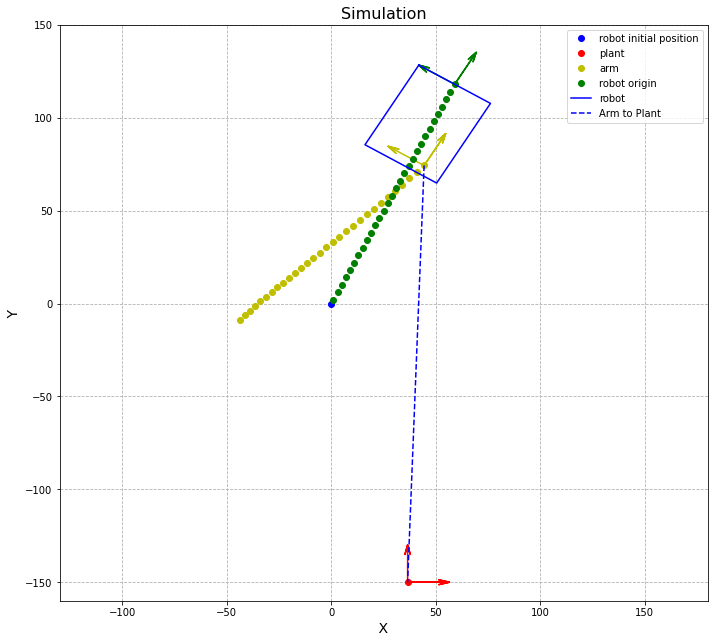

In [41]:
robot_x = []
robot_y = []
arm_x = []
arm_y = []

fig = plt.figure()
ax=fig.add_axes([0,0,1.5,2])

for i in range(1,61,2):
    gama_deg = i
    gama = gama_deg*pi/180
    H_o_r = np.array([[np.cos(gama), -np.sin(gama), 0, i],
                     [np.sin(gama), np.cos(gama), 0, 2*i],
                     [0, 0, 1, 0],
                     [0, 0, 0, 1]])

    theta1, distance, height = localize(H_o_r)
    print("theta1 = ",round(theta1,5), "distance = ",round(distance,5), "height = ",round(height,5))
    
    robot_y.append(H_o_r[1][3])
    robot_x.append(H_o_r[0][3])
    H_o_a0 = np.matmul(H_o_r, H_r_a0)
    arm_y.append(H_o_a0[1][3])
    arm_x.append(H_o_a0[0][3])

robot_x = np.array(robot_x)
robot_y = np.array(robot_y)
arm_x = np.array(arm_x)
arm_y = np.array(arm_y)

points_x, points_y = robot_outline(H_o_r)

plt.plot(0,0,'ob',label="robot initial position")
plt.plot(H_o_p[0][3],H_o_p[1][3],'or',label="plant")
draw_axis(H_o_p,'-r')

plt.plot(arm_x,arm_y,'oy',label="arm")
draw_axis(H_o_a0,'-y')

plt.plot(robot_x,robot_y,'og',label="robot origin")
#plt.plot(H_o_r[0][3],H_o_r[1][3],'og',label="robot origin")
draw_axis(H_o_r,'-g')

plt.plot(points_x,points_y,'-b',label="robot")

plt.plot(np.array([H_o_a0[0][3],H_o_p[0][3]]),np.array([H_o_a0[1][3],H_o_p[1][3]]),'--b',label="Arm to Plant")

plt.xlim((-130,180))
plt.ylim((-160,150))
plt.title("Simulation",fontsize=16)
plt.xlabel(" X ",fontsize=14)
plt.ylabel(" Y ",fontsize=14)
plt.grid(True,which="both", linestyle='--')
plt.legend()
plt.show()